### Audio Classification EDA

In [1]:
!pip install librosa

  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23706 sha256=08557308ec56bf4fead2e39779655eaa256392fe04cb8d7bb0daf3fcd6d26251
  Stored in directory: c:\users\mamoo\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='D:/UrbanSound8K/UrbanSound8K/car_horns.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

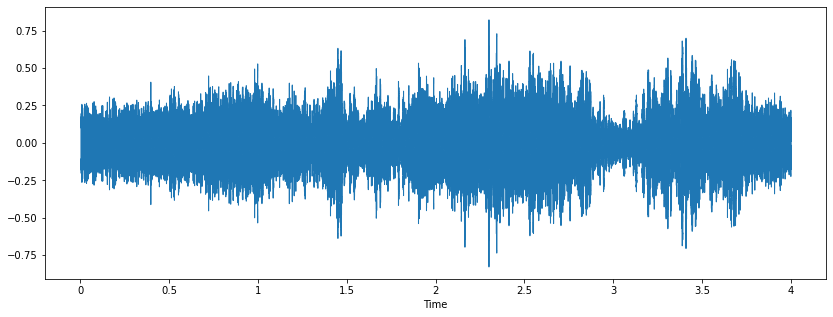

In [6]:
### Car Horn Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate # Librosa has a set 22khz sampling rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate # Scipy doesn't have a set sample rate

44100

In [9]:
wave_audio, data # Librosa normalizes values

(array([[ 2857,   704],
        [ 2884,  -226],
        [ 2170,  -844],
        ...,
        [-3288,  1241],
        [-3331,  1312],
        [-3381,   764]], dtype=int16),
 array([ 0.03712244,  0.0248932 , -0.06111414, ..., -0.07128406,
        -0.04063816, -0.03386482], dtype=float32))

In [10]:
import pandas as pd
metadata=pd.read_csv('D:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [11]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [17]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


### Audio Preprocessing

In [20]:
### Read a sample audio using librosa
audio_file_path='D:/UrbanSound8K/UrbanSound8K/car_horns.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)

[ 0.03712244  0.0248932  -0.06111414 ... -0.07128406 -0.04063816
 -0.03386482]


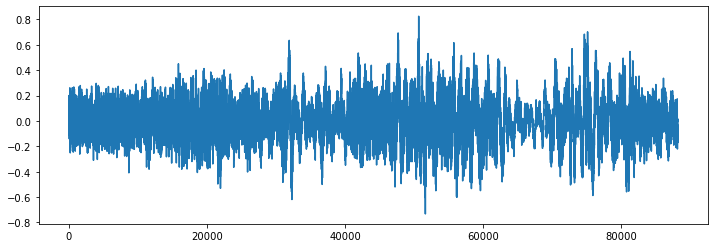

In [22]:
### Plot the librosa audio data
import matplotlib.pyplot as plt
%matplotlib inline
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
# Signal is converted to mono by librosa

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [24]:
mfccs

array([[-107.62022   ,  -74.33483   ,  -73.376274  , ..., -138.4298    ,
        -144.77994   , -155.00746   ],
       [ 118.39894   ,  120.206024  ,  119.55333   , ...,  119.42833   ,
         122.90054   ,  130.98001   ],
       [ -18.711147  ,  -16.050922  ,  -17.668072  , ...,  -23.990772  ,
         -25.47179   ,  -22.97263   ],
       ...,
       [  -5.136691  ,   -0.77460194,   -1.4204321 , ...,   -7.0501757 ,
          -2.951353  ,   -5.2899733 ],
       [  -4.134699  ,    1.2294049 ,    0.47926378, ...,    6.088805  ,
           5.6399064 ,    6.1516323 ],
       [   5.1883917 ,    5.773163  ,    5.1530924 , ...,    8.976442  ,
           4.960932  ,    1.9142513 ]], dtype=float32)

In [28]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='D:/UrbanSound8K/UrbanSound8K/audio/'
metadata=pd.read_csv('D:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [29]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [30]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:49,  8.48it/s]C:\Users\mamoo\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [13:53, 14.46it/s]C:\Users\mamoo\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\mamoo\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [14:30, 10.03it/s]


In [31]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [32]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [33]:
X.shape

(8732, 40)

In [34]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [35]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [36]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6985, 40), (1747, 40), (6985, 10), (1747, 10))

### Model Creation

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [42]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [44]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [45]:
## Training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
217/219 [============================>.] - ETA: 0s - loss: 9.2228 - accuracy: 0.1263
Epoch 1: val_loss improved from inf to 2.28630, saving model to audio_classification.hdf5
219/219 [==============================] - 9s 10ms/step - loss: 9.1874 - accuracy: 0.1264 - val_loss: 2.2863 - val_accuracy: 0.1357
Epoch 2/150
211/219 [===========================>..] - ETA: 0s - loss: 2.4907 - accuracy: 0.1244
Epoch 2: val_loss improved from 2.28630 to 2.27530, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.4869 - accuracy: 0.1244 - val_loss: 2.2753 - val_accuracy: 0.1191
Epoch 3/150
213/219 [============================>.] - ETA: 0s - loss: 2.3151 - accuracy: 0.1281
Epoch 3: val_loss improved from 2.27530 to 2.24587, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.3133 - accuracy: 0.1286 - val_loss: 2.2459 - val_accuracy: 0.1374
Epoch 4/150
218/219 [================

219/219 [==============================] - 1s 6ms/step - loss: 1.3577 - accuracy: 0.5276 - val_loss: 1.1808 - val_accuracy: 0.6153
Epoch 27/150
217/219 [============================>.] - ETA: 0s - loss: 1.3295 - accuracy: 0.5393
Epoch 27: val_loss improved from 1.18082 to 1.15460, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.3306 - accuracy: 0.5389 - val_loss: 1.1546 - val_accuracy: 0.6308
Epoch 28/150
212/219 [============================>.] - ETA: 0s - loss: 1.3472 - accuracy: 0.5317
Epoch 28: val_loss improved from 1.15460 to 1.12237, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 1.3467 - accuracy: 0.5323 - val_loss: 1.1224 - val_accuracy: 0.6451
Epoch 29/150
219/219 [==============================] - ETA: 0s - loss: 1.3053 - accuracy: 0.5420
Epoch 29: val_loss did not improve from 1.12237
219/219 [==============================] - 1s 6ms/step - loss: 1.3053 - acc

Epoch 54/150
206/219 [===========================>..] - ETA: 0s - loss: 1.0909 - accuracy: 0.6333
Epoch 54: val_loss improved from 0.94537 to 0.91535, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.0977 - accuracy: 0.6325 - val_loss: 0.9154 - val_accuracy: 0.7006
Epoch 55/150
213/219 [============================>.] - ETA: 0s - loss: 1.1108 - accuracy: 0.6196
Epoch 55: val_loss did not improve from 0.91535
219/219 [==============================] - 1s 3ms/step - loss: 1.1071 - accuracy: 0.6208 - val_loss: 0.9247 - val_accuracy: 0.6961
Epoch 56/150
213/219 [============================>.] - ETA: 0s - loss: 1.0886 - accuracy: 0.6271
Epoch 56: val_loss did not improve from 0.91535
219/219 [==============================] - 1s 3ms/step - loss: 1.0867 - accuracy: 0.6276 - val_loss: 0.9226 - val_accuracy: 0.6961
Epoch 57/150
216/219 [============================>.] - ETA: 0s - loss: 1.0781 - accuracy: 0.6257
Epoch 57: val_loss did n

206/219 [===========================>..] - ETA: 0s - loss: 0.9932 - accuracy: 0.6646
Epoch 82: val_loss did not improve from 0.82589
219/219 [==============================] - 1s 3ms/step - loss: 0.9908 - accuracy: 0.6644 - val_loss: 0.8511 - val_accuracy: 0.7149
Epoch 83/150
214/219 [============================>.] - ETA: 0s - loss: 1.0339 - accuracy: 0.6561
Epoch 83: val_loss did not improve from 0.82589
219/219 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.6571 - val_loss: 0.8471 - val_accuracy: 0.7373
Epoch 84/150
211/219 [===========================>..] - ETA: 0s - loss: 1.0060 - accuracy: 0.6651
Epoch 84: val_loss did not improve from 0.82589
219/219 [==============================] - 1s 2ms/step - loss: 1.0099 - accuracy: 0.6639 - val_loss: 0.8444 - val_accuracy: 0.7258
Epoch 85/150
196/219 [=========================>....] - ETA: 0s - loss: 0.9782 - accuracy: 0.6719
Epoch 85: val_loss improved from 0.82589 to 0.80311, saving model to audio_classific

Epoch 111/150
211/219 [===========================>..] - ETA: 0s - loss: 0.9401 - accuracy: 0.6871
Epoch 111: val_loss did not improve from 0.77230
219/219 [==============================] - 1s 2ms/step - loss: 0.9460 - accuracy: 0.6865 - val_loss: 0.7855 - val_accuracy: 0.7590
Epoch 112/150
212/219 [============================>.] - ETA: 0s - loss: 0.9544 - accuracy: 0.6810
Epoch 112: val_loss did not improve from 0.77230
219/219 [==============================] - 1s 2ms/step - loss: 0.9532 - accuracy: 0.6813 - val_loss: 0.7877 - val_accuracy: 0.7510
Epoch 113/150
213/219 [============================>.] - ETA: 0s - loss: 0.9570 - accuracy: 0.6882
Epoch 113: val_loss did not improve from 0.77230
219/219 [==============================] - 1s 2ms/step - loss: 0.9571 - accuracy: 0.6883 - val_loss: 0.8155 - val_accuracy: 0.7510
Epoch 114/150
219/219 [==============================] - ETA: 0s - loss: 0.9503 - accuracy: 0.6868
Epoch 114: val_loss did not improve from 0.77230
219/219 [======

219/219 [==============================] - 1s 3ms/step - loss: 0.9296 - accuracy: 0.6868 - val_loss: 0.7241 - val_accuracy: 0.7756
Epoch 140/150
212/219 [============================>.] - ETA: 0s - loss: 0.9361 - accuracy: 0.6925
Epoch 140: val_loss did not improve from 0.72412
219/219 [==============================] - 1s 2ms/step - loss: 0.9362 - accuracy: 0.6935 - val_loss: 0.7468 - val_accuracy: 0.7670
Epoch 141/150
213/219 [============================>.] - ETA: 0s - loss: 0.9081 - accuracy: 0.6910
Epoch 141: val_loss did not improve from 0.72412
219/219 [==============================] - 1s 2ms/step - loss: 0.9071 - accuracy: 0.6911 - val_loss: 0.7650 - val_accuracy: 0.7556
Epoch 142/150
216/219 [============================>.] - ETA: 0s - loss: 0.9206 - accuracy: 0.6904
Epoch 142: val_loss did not improve from 0.72412
219/219 [==============================] - 1s 2ms/step - loss: 0.9215 - accuracy: 0.6905 - val_loss: 0.7517 - val_accuracy: 0.7779
Epoch 143/150
211/219 [=========

In [46]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7767601609230042


In [56]:
filename1='D:/UrbanSound8K/UrbanSound8K/test_horn.wav'
prediction_feature=features_extractor(filename1)

In [66]:
pred_feature=prediction_feature.reshape(1,-1)
pred_feature.shape

(1, 40)

In [67]:
np.argmax(model.predict(pred_feature),axis=1)

array([1], dtype=int64)

In [72]:
metadata["class"].value_counts

<bound method IndexOpsMixin.value_counts of 0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object>

In [73]:
metadata["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [79]:
filename="D:/UrbanSound8K/UrbanSound8K/test_horn.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-146.91139      91.63416     -51.20437      25.459862     -9.728251
   19.965199      5.265906     10.191816    -19.143833      9.847607
  -10.333783      4.8565025    -4.837134     14.733119      5.018094
   21.505404      2.1051347    12.417943     -0.29707292    2.1063855
  -10.915523     -8.92076     -11.499326      8.726506     -0.4544847
   -5.8571596    -5.775079     18.932701     17.17827      -7.2646327
  -24.027824     -1.1454229    20.348831     12.10104      -0.21853457
    1.6448992    -8.34766     -21.930735     -0.39549392   22.463459  ]
[[-146.91139      91.63416     -51.20437      25.459862     -9.728251
    19.965199      5.265906     10.191816    -19.143833      9.847607
   -10.333783      4.8565025    -4.837134     14.733119      5.018094
    21.505404      2.1051347    12.417943     -0.29707292    2.1063855
   -10.915523     -8.92076     -11.499326      8.726506     -0.4544847
    -5.8571596    -5.775079     18.932701     17.17827      -7.2646327
   -24.027824    

In [80]:
predicted_label=np.argmax(model.predict(mfccs_scaled_features), axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[1]


array(['car_horn'], dtype='<U16')